In [6]:
from gensim.models import KeyedVectors
import numpy as np

import matplotlib.pyplot as plt
from sklearn.decomposition import PCA

In [3]:
path = 'models/model.bin'
model = KeyedVectors.load(path)

print('Done: loaded')
print('Number of all words: {}'.format(len(model.wv.vocab)))

Done: loaded
Number of all words: 341


Look for a target word and most similar words to a wordlist

In [25]:
target_word = 'himself'

if target_word in model.wv.vocab:
    print('The input word exists')
    words_lists = []
    words_lists.append(target_word)
    similar_words = model.most_similar([target_word], topn=30)
    for i in similar_words:
        print(i[0], i[1])
        words_lists.append(i[0])
    print('-------------------------------')
    print(model[target_word])
else:
    print('---------------------------')

The input word exists
straight 0.9995263814926147
day 0.9995036125183105
side 0.9995025396347046
whole 0.99950110912323
able 0.9994931221008301
home 0.9994916319847107
about 0.9994831681251526
around 0.9994795322418213
probably 0.9994691610336304
got 0.9994679093360901
taken 0.9994670152664185
mother, 0.9994666576385498
morning 0.9994634985923767
called 0.9994618892669678
father, 0.9994614720344543
know 0.9994583129882812
often 0.9994571208953857
took 0.9994552135467529
towards 0.9994537830352783
pressed 0.9994530081748962
give 0.999451756477356
turned 0.9994513988494873
now 0.9994438886642456
ran 0.9994436502456665
She 0.9994415044784546
clear 0.9994406700134277
wanted 0.9994400143623352
hand 0.9994378089904785
these 0.9994356632232666
each 0.9994347095489502
-------------------------------
[ 0.0791681   0.1558935  -0.00650949  0.15049466 -0.09391792 -0.04290541
  0.02485883  0.17430902 -0.0225552   0.04131588 -0.01691973  0.20265846
  0.09470883  0.06629106  0.04842711  0.11680816  0

<ipython-input-25-17169a4a00b8>:7: DeprecationWarning: Call to deprecated `most_similar` (Method will be removed in 4.0.0, use self.wv.most_similar() instead).
  similar_words = model.most_similar([target_word], topn=30)
<ipython-input-25-17169a4a00b8>:12: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  print(model[target_word])


In [38]:
def plot_mywords(words):
    plt.style.use('bmh')
    word_vectors = np.vstack([model[w] for w in words])
    two_dim = PCA().fit_transform(word_vectors)[:, :2]
    two_dim.shape
    plt.figure(figsize=(15, 8))
    plt.scatter(two_dim[:, 0], two_dim[:,1], c='r', marker=(5,2))
    for word, (x, y) in zip(words, two_dim):
        plt.text(x, y, word, fontsize=10, fontname='Courier', fontweight='normal')
    plt.axis('on')
    plt.draw()
    plt.show()

<ipython-input-38-f4e4e5d4949f>:3: DeprecationWarning: Call to deprecated `__getitem__` (Method will be removed in 4.0.0, use self.wv.__getitem__() instead).
  word_vectors = np.vstack([model[w] for w in words])


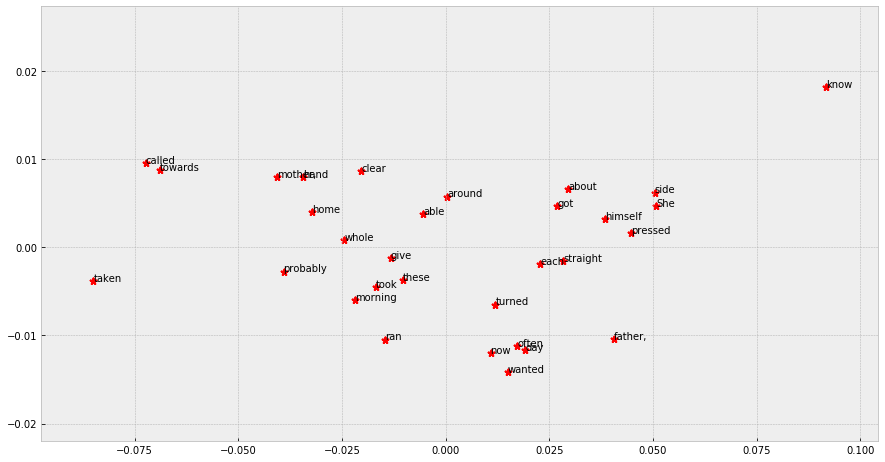

In [39]:
plot_mywords(words_lists)